# Librerias

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clasificacion

KNN: Algoritmo que predice una etiqueta para un punto dado basado en los "K" valores cercanos al punto. Se le asigna el valor mayoritario del grupo de "k"

In [1]:
#Importamos la funcion de scikit learn para el clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv(r"../../data/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Descripcion del dataset: 
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results

    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.shape

(303, 14)

In [9]:
X = df[["age","thall"]].values
y = df["output"].values
print(X.shape,y.shape)

(303, 2) (303,)


In [10]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [12]:
X_new = np.array([[25,2],[40,1]])

predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 1]


# Metricas

$\Large Accuracy = \frac{\textrm{predicciones correctas}}{{\textrm{total de observaciones}}}$

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=66,stratify=y)

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.5934065934065934


In [20]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)


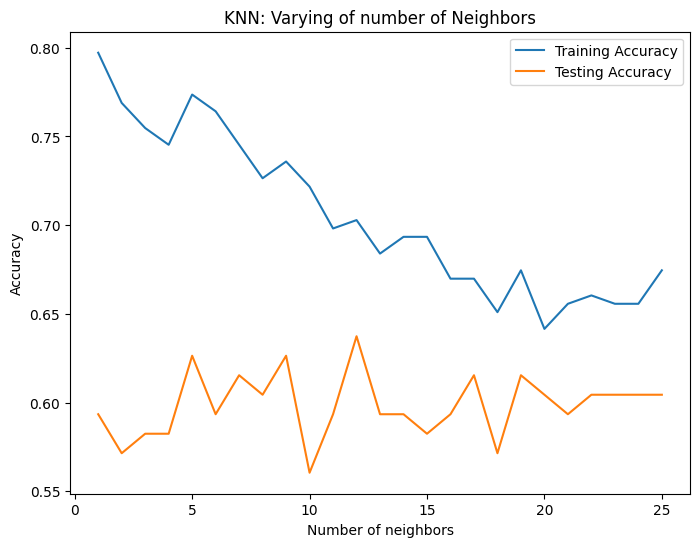

In [24]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying of number of Neighbors")
plt.plot(neighbors,train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()